In [1]:
from google.colab import files
uploaded = files.upload()

Saving data.zip to data.zip


In [2]:
import zipfile
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [6]:
zip_file_path = 'data.zip'
target_folder = '/content'
os.makedirs(target_folder, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
  zip_ref.extractall(target_folder)

work_data = os.path.join(target_folder, 'data')

for file in os.listdir(work_data):
  path_data_2D = os.path.join(work_data, os.listdir(work_data)[1])
  path_data_mnist = os.path.join(work_data, os.listdir(work_data)[0])

data_2D = pd.read_csv(path_data_2D, header=None)
data_mnist = pd.read_csv(path_data_mnist, header=None)

In [7]:
data_2D.head()

,0,1,2
0,0.0,-0.768716,0.460860
1,0.0,2.687848,2.366961
2,0.0,-0.201379,0.470430
3,0.0,0.608496,1.225400
4,0.0,-0.082282,1.137218


In [8]:
data_mnist.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


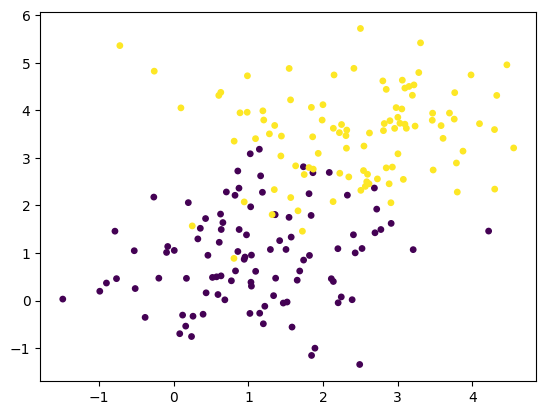

In [9]:
plt.scatter(data_2D.values[:,1], data_2D.values[:,2], c = data_2D.values[:,0], s=15)
plt.show()

# Завдання 1
У цьому завданні вам потрібно завантажити ось цей датасет. Тут ви знайдете 2 файли - з двовимірним датасетом та датасетом mnist. Для кожного з них застосуйте алгоритм K-means для кластеризації. Щоб знайти оптимальну кількість кластерів, скористайтесь ліктевим методом.

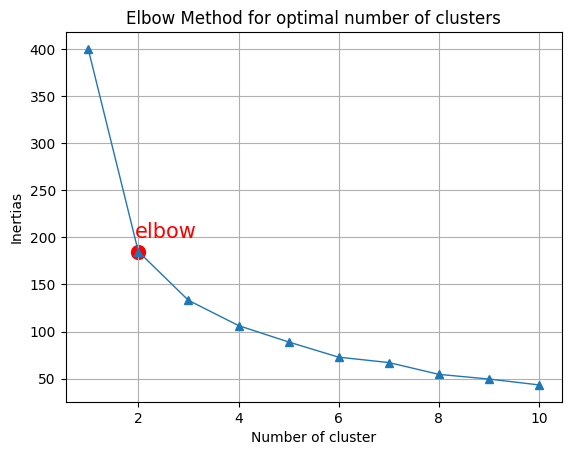

In [12]:
#Нормалізація даних датасету та видалення першого стовпчика з нульовими даними:
X_2d = data_2D.drop([0], axis=1)
X_2d_norm = StandardScaler().fit_transform(X_2d)
#Створення кількість кластерів:
k_range = range(1, 11)
#Розрахунок енерції та навчання нашої моделі:
inertia = []

for i in k_range:
  kmean = KMeans(n_clusters=i, n_init='auto').fit(X_2d_norm)
  inertia.append(kmean.inertia_)

#Візуалізація методу локтя
plt.plot(k_range, inertia, marker='^', linewidth=1)
plt.title('Elbow Method for optimal number of clusters')
plt.xlabel('Number of cluster')
plt.ylabel('Inertias')
plt.scatter(k_range[1], inertia[1], c='red', marker='o', s=100)
plt.annotate('elbow', (k_range[1], inertia[1]), textcoords="offset points", xytext=(20, 10), ha='center', fontsize=15, color='red')
plt.grid()
plt.show()


Можна зробити висновок, що оптимальна кількість кластерів для даного датасету - 2

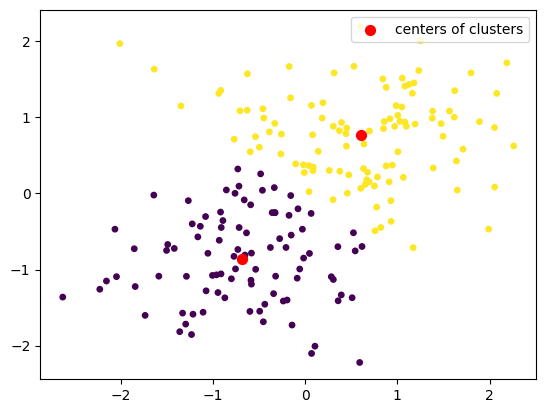

In [14]:
#Кластеризація даних для даного датасету на основі отриманих даних:
kmeans = KMeans(n_clusters=2, n_init='auto').fit(X_2d_norm)
plt.scatter(x=X_2d_norm[:, 0], y=X_2d_norm[:, 1], c=kmeans.labels_, s=15)
plt.scatter(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], marker='o', s=50, c='red', label='centers of clusters')
plt.legend(fontsize=10, loc='upper right')
plt.show()

# Завдання 2
​

Візуалізуйте результат роботи кластеризації. Для випадку з mnist датасетом, вам потрібно ще скористатись алгоритмом PCA щоб зменшити розмірність вашим даних до 2-вимірного варіанту.

In [20]:

X_mnist_norm = StandardScaler().fit_transform(data_mnist)
X_pca = PCA(n_components=2).fit_transform(X_mnist_norm)
pd.DataFrame(X_pca).describe().round(3)


,0,1
count,500.000,500.000
mean,0.000,-0.000
std,6.489,5.426
min,-9.055,-12.465
25%,-4.574,-4.064
50%,-1.257,-0.983
75%,2.957,3.611
max,26.645,15.695


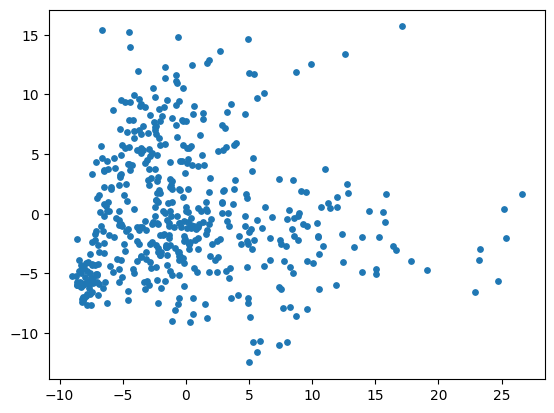

In [21]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=15)
plt.show()

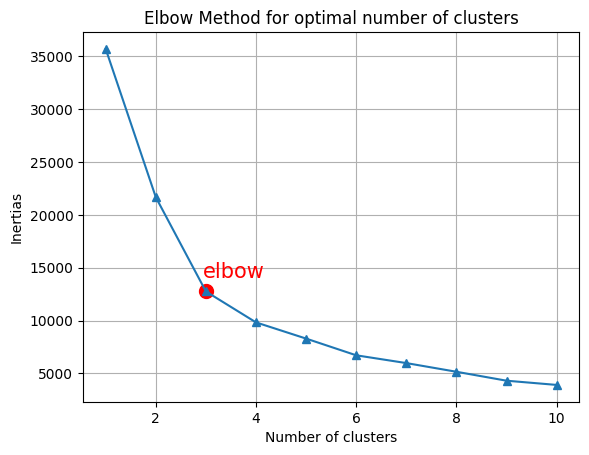

In [23]:
inertias = []
k_range = range(1,11)

for i in k_range:
  kmean = KMeans(n_clusters=i, n_init='auto').fit(X_pca)
  inertias.append(kmean.inertia_)
plt.plot(k_range, inertias, marker='^')
plt.scatter(k_range[2], inertias[2], marker='o', s=100, c='red')
plt.annotate('elbow', (k_range[2], inertias[2]), textcoords='offset points', xytext=(20, 10), ha='center', fontsize=15, color='red')
plt.title('Elbow Method for optimal number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertias')
plt.grid()

Можна зробити висновок, що оптимальна кількість кластерів для даного датасету - 3

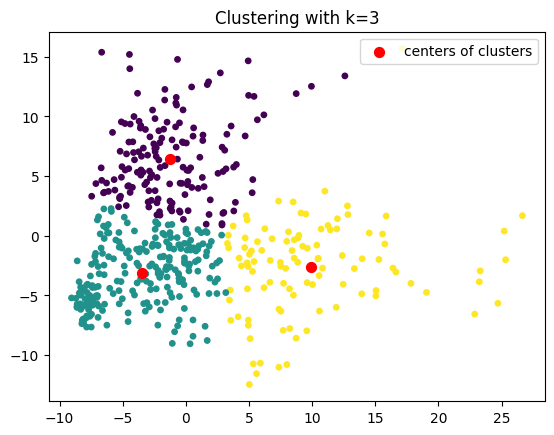

In [24]:
kmeans_mnist = KMeans(n_clusters=3, n_init='auto').fit(X_pca)
plt.scatter(x=X_pca[:,0], y=X_pca[:,1], c=kmeans_mnist.labels_, s=15)
plt.scatter(x=kmeans_mnist.cluster_centers_[:, 0], y=kmeans_mnist.cluster_centers_[:, 1], marker = 'o', c=['red'], s=50, label='centers of clusters')
plt.legend(fontsize=10, loc='upper right')
plt.title('Clustering with k=3')
plt.show()